In [31]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import plotting 
import seaborn as sns
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析
from sklearn.cluster import KMeans # K-means クラスタリング

### 主成分分析
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [22]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/SchoolScore.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'SchoolScore.txt')

('SchoolScore.txt', <http.client.HTTPMessage at 0x28da7b560c8>)

In [28]:
#データの読み込み
df = pd.read_csv("SchoolScore.txt", sep="\t", index_col=0)

In [29]:
#データのチェック
df.head()

,Japanese,Math,English
Student,,,
0,80,85,100
1,96,100,100
2,54,83,98
3,80,98,98
4,90,92,91


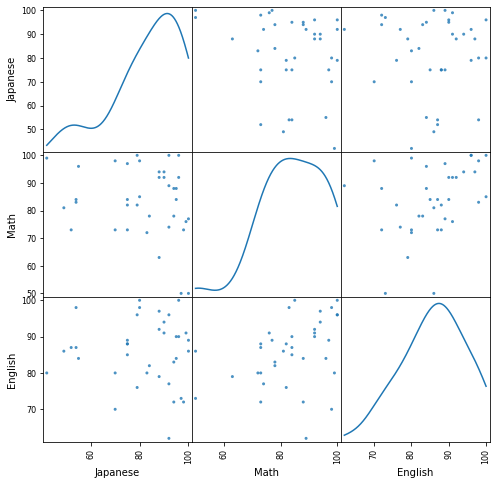

In [36]:
plotting.scatter_matrix(df[df.columns[0:]], figsize=(8,8), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

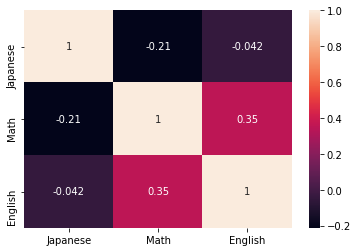

In [35]:
correlation_matrix = np.corrcoef(df.transpose())
#ヒートマップで相関行列を見る
sns.heatmap(correlation_matrix, annot=True, 
            xticklabels=df.columns,
            yticklabels=df.columns)
# グラフを表示する
plt.show()

In [9]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Math,English
Student,,
0,0.112609,1.570234
1,1.291820,1.570234
2,-0.044619,1.350163
3,1.134592,1.350163
4,0.662908,0.579916


### k-means
https://qiita.com/maskot1977/items/34158d044711231c4292

In [10]:
# クラスタリングを実行、この例では 3 つのグループに分割 
kmeans_model = KMeans(n_clusters=3, random_state=10).fit(df.iloc[:, 1:])

In [11]:
# 分類結果のラベルを取得する
labels = kmeans_model.labels_

In [12]:
# 分類結果を確認
labels

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1])

In [13]:
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}

In [14]:
# サンプル毎に色を与える。
colors = [color_codes[x] for x in labels]

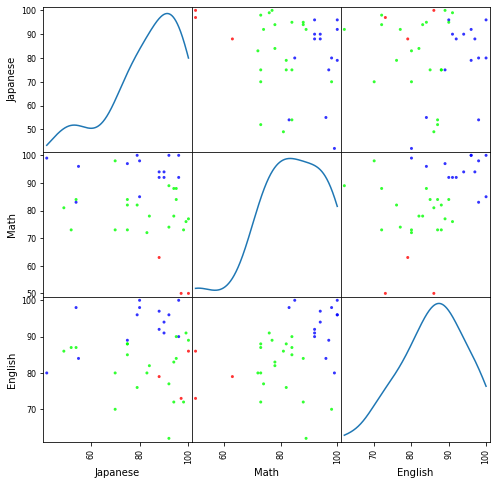

In [37]:
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(df[df.columns[0:]], figsize=(8,8), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
plt.show()

In [19]:
#主成分分析の実行
pca = PCA()
pca.fit(df.iloc[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(df.iloc[:, 1:])

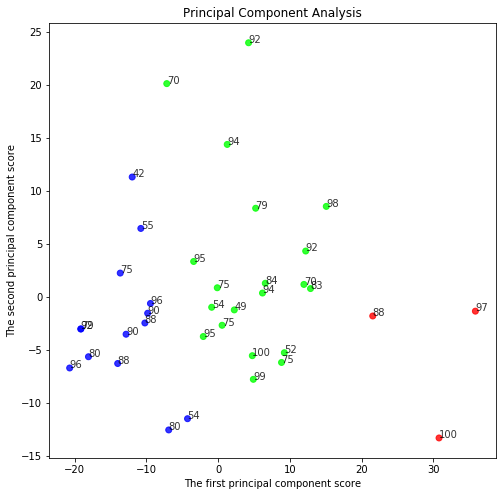

In [38]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.iloc[:, 0]):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score")
plt.ylabel("The second principal component score")
plt.show()